<a href="https://colab.research.google.com/github/RustamAliyevsHub/Playground/blob/main/Worlds_Top_Economies.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

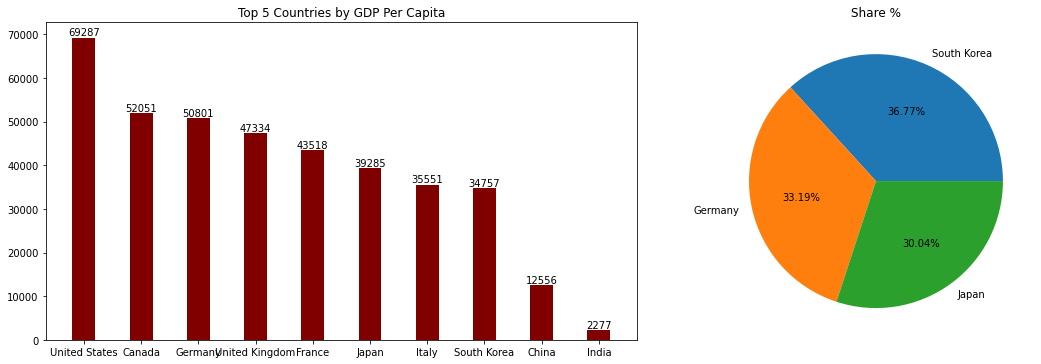

In [28]:
from matplotlib import axes
# importing the libraries
import requests
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# disabling SettingWithCopyWarning
pd.options.mode.chained_assignment = None  # default='warn'

# importing the data from the webpage into a DataFrame
url='https://www.investopedia.com/insights/worlds-top-economies/'
req=requests.get(url)
data=pd.read_html(req.text)
df=data[0]

# setting the first row as a column name
df.columns = df.iloc[0]

# setting all data except first row as data 
df = df[1:]

# removing unnecessary characters from columns
df['GDP Per Capita']=df['GDP Per Capita'].str.replace(r"$","", regex=True).str.replace(r",","", regex=True)
df['Nominal GDP (in trillions)']=df['Nominal GDP (in trillions)'].str.replace(r"$","", regex=True)
df['PPP Adjusted GDP (in trillions)']=df['PPP Adjusted GDP (in trillions)'].str.replace(r"$","", regex=True)
df['Annual Growth (%)']=df['Annual Growth (%)'].str.replace(r"%","")

# changing the data type of the Gross column to make the column numeric
df['GDP Per Capita']=df['GDP Per Capita'].astype('int64')

df1=df[['Country','GDP Per Capita','Nominal GDP (in trillions)','PPP Adjusted GDP (in trillions)','Annual Growth (%)']].sort_values(ascending=False,by='GDP Per Capita')

# Plotting a figure of width 10 and height 5 and including 2 graphs
fig, ax = plt.subplots(1, 2, figsize=(15, 5), gridspec_kw={'width_ratios': [3, 2]})

# Making visual adjustments
fig.tight_layout()

# Plotting the top 5 countries by GDP Per Capita
ax[0].bar(df1['Country'], df1['GDP Per Capita'], color ='maroon', width = 0.4)

# Labelling the bars in the bar graph
for p in ax[0].patches:
  ax[0].annotate(p.get_height(),(p.get_x()+p.get_width()/2,p.get_height()),ha='center',va='bottom')

# Plotting the top 3 countries
ax[1].pie(df1['GDP Per Capita'].sample(3),labels = df1['Country'].sample(3), autopct = '%.2f%%')

# Setting the titles
ax[0].set_title("Top 5 Countries by GDP Per Capita")
ax[1].set_title("Share %")

plt.show()

